# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from seaborn import load_dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
#1.
tips = sns.load_dataset("tips")

# Criar a matriz de design e a matriz y utilizando Patsy
y, X = patsy.dmatrices('tip ~ sex + smoker + day + time + total_bill', data=tips, return_type='dataframe')
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
print("Matriz y:")
print(y.head())
print("\nMatriz de design X:")
X.head()

Matriz y:
    tip
0  1.01
1  1.66
2  3.50
3  3.31
4  3.61

Matriz de design X:


,Intercept,sex[T.Female],smoker[T.No],day[T.Fri],day[T.Sat],day[T.Sun],time[T.Dinner],total_bill
0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,16.99
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,10.34
2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,21.01
3,1.0,0.0,1.0,0.0,0.0,1.0,1.0,23.68
4,1.0,1.0,1.0,0.0,0.0,1.0,1.0,24.59


In [3]:
model = sm.OLS(y, X)
result = model.fit()
# Exibir os resultados estatísticos do modelo inicial
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     28.88
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.37e-28
Time:                        20:57:42   Log-Likelihood:                -349.47
No. Observations:                 244   AIC:                             714.9
Df Residuals:                     236   BIC:                             742.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7782      0.239      3.258      0.001       0.308       1.249
sex[T.Female]      0.0376      0.142      0.264      0.792      -0.243       0.318
smoker[T.No]       0.1418      0.145      0.980      0.328      -0.143       0.427
day[T.Fri]         0.1757      0.396      0.444      0.657      -0.604       0.955
day[T.Sat]         0.0966      0.473      0.204      0.838      -0.834       1.028
day[T.Sun]         0.2262      0.472      0.479      0.632      -0.704       1.157
time[T.Dinner]    -0.1324      0.446     -0.297      0.767      -1.011       0.746
total_bill         0.1059      0.008     13.788      0.000       0.091       0.121
==============================================================================
Omnibus:                       24.388   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.533
Skew:                           0.537   Prob(JB):                     1.30e-10
Kurtosis:                       4.823   Cond. No.                         279.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
#2. Remover variáveis não significativas
X_filtered = X[['Intercept', 'sex[T.Female]', 'smoker[T.No]', 'total_bill']]  # Manter apenas as variáveis significativas
# Ajustar o modelo novamente com as variáveis filtradas
model_filtered = sm.OLS(y, X_filtered)
result_filtered = model_filtered.fit()
# Exibir os resultados estatísticos do modelo filtrado
result_filtered.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     67.99
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           7.39e-32
Time:                        20:57:42   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             707.8
Df Residuals:                     240   BIC:                             721.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7998      0.200      3.998      0.000       0.406       1.194
sex[T.Female]     0.0281      0.138      0.203      0.839      -0.244       0.300
smoker[T.No]      0.1492      0.135      1.102      0.272      -0.118       0.416
total_bill        0.1059      0.007     14.158      0.000       0.091       0.121
==============================================================================
Omnibus:                       23.998   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.857
Skew:                           0.528   Prob(JB):                     1.82e-10
Kurtosis:                       4.815   Cond. No.                         73.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

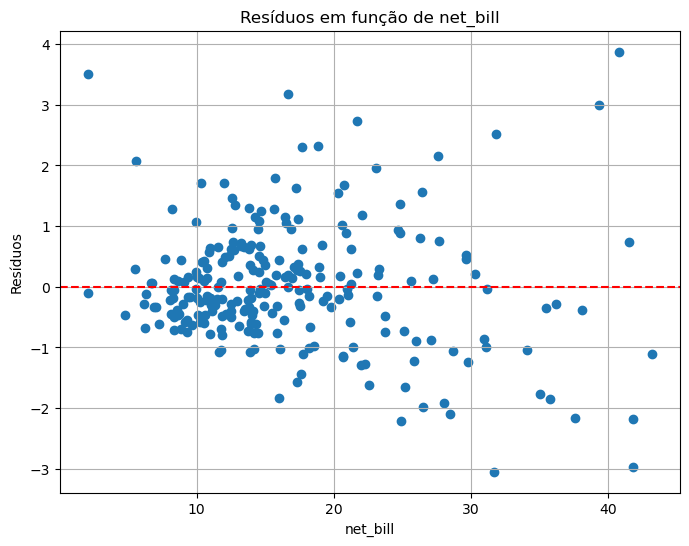

In [5]:
#3. Calcular os resíduos
residuos = result.resid

# Criar o gráfico de resíduos em função de net_bill
plt.figure(figsize=(8, 6))
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(tips['net_bill'], residuos)
plt.title('Resíduos em função de net_bill')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.grid(True)
plt.show()

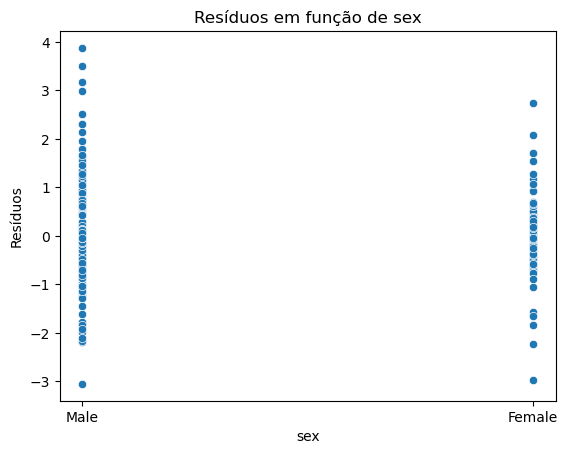

In [6]:
#3.segunda opção
plt.close('all')
tips['res_tip'] = residuos
# Criar o gráfico de dispersão dos resíduos em relação à variável 'sex'
sns.scatterplot(x='sex', y='res_tip', data=tips)
plt.title('Resíduos em função de sex')
plt.xlabel('sex')
plt.ylabel('Resíduos')
plt.show()

In [7]:
#4. Adicionar transformações de net_bill ao DataFrame tips
tips['net_bill_log'] = np.log(tips['net_bill'])
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustar modelos com as diferentes transformações
model_linear = smf.ols('tip ~ sex + smoker + total_bill', data=tips).fit()
model_log = smf.ols('tip ~ sex + smoker + net_bill_log', data=tips).fit()
model_poly = smf.ols('tip ~ sex + smoker + net_bill_squared', data=tips).fit()

In [8]:
# Comparar os resultados
print("Modelo Linear:")
model_linear.summary()

Modelo Linear:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     67.99
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           7.39e-32
Time:                        20:57:42   Log-Likelihood:                -349.90
No. Observations:                 244   AIC:                             707.8
Df Residuals:                     240   BIC:                             721.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7998      0.200      3.998      0.000       0.406       1.194
sex[T.Female]     0.0281      0.138      0.203      0.839      -0.244       0.300
smoker[T.No]      0.1492      0.135      1.102      0.272      -0.118       0.416
total_bill        0.1059      0.007     14.158      0.000       0.091       0.121
==============================================================================
Omnibus:                       23.998   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.857
Skew:                           0.528   Prob(JB):                     1.82e-10
Kurtosis:                       4.815   Cond. No.                         73.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print("\nModelo com Transformação Logarítmica:")
model_log.summary()


Modelo com Transformação Logarítmica:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     33.43
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           4.31e-18
Time:                        20:57:42   Log-Likelihood:                -382.35
No. Observations:                 244   AIC:                             772.7
Df Residuals:                     240   BIC:                             786.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.2716      0.462     -2.752      0.006      -2.182      -0.361
sex[T.Female]    -0.0227      0.158     -0.144      0.886      -0.334       0.289
smoker[T.No]      0.0433      0.154      0.281      0.779      -0.261       0.347
net_bill_log      1.5678      0.159      9.879      0.000       1.255       1.880
==============================================================================
Omnibus:                       74.660   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              224.548
Skew:                           1.314   Prob(JB):                     1.74e-49
Kurtosis:                       6.896   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
print("\nModelo com Transformação Polinomial:")
model_poly.summary()


Modelo com Transformação Polinomial:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     35.03
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           8.20e-19
Time:                        20:57:42   Log-Likelihood:                -380.65
No. Observations:                 244   AIC:                             769.3
Df Residuals:                     240   BIC:                             783.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.1626      0.162     13.384      0.000       1.844       2.481
sex[T.Female]       -0.0479      0.157     -0.306      0.760      -0.356       0.260
smoker[T.No]         0.1690      0.154      1.096      0.274      -0.135       0.473
net_bill_squared     0.0022      0.000     10.117      0.000       0.002       0.003
==============================================================================
Omnibus:                       24.849   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.409
Skew:                           0.667   Prob(JB):                     3.37e-08
Kurtosis:                       4.266   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [11]:
#1.
y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + total_bill + net_bill', data=tips, return_type='dataframe')

# Visualizar as primeiras linhas das matrizes
print("Matriz y:")
print(y.head())
print("\nMatriz de design X:")
X.head()

Matriz y:
   np.log(tip)
0     0.009950
1     0.506818
2     1.252763
3     1.196948
4     1.283708

Matriz de design X:


,Intercept,sex[T.Female],smoker[T.No],total_bill,net_bill
0,1.0,1.0,1.0,16.99,15.98
1,1.0,0.0,1.0,10.34,8.68
2,1.0,0.0,1.0,21.01,17.51
3,1.0,0.0,1.0,23.68,20.37
4,1.0,1.0,1.0,24.59,20.98


In [12]:
# Ajustar o modelo inicial
model = sm.OLS(y, X).fit()
# Verificar os resultados
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     627.5
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.90e-125
Time:                        20:57:42   Log-Likelihood:                 154.73
No. Observations:                 244   AIC:                            -299.5
Df Residuals:                     239   BIC:                            -282.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0922      0.026      3.521      0.001       0.041       0.144
sex[T.Female]     0.0056      0.018      0.319      0.750      -0.029       0.040
smoker[T.No]      0.0015      0.017      0.087      0.931      -0.032       0.035
total_bill        0.2995      0.007     40.619      0.000       0.285       0.314
net_bill         -0.2989      0.008    -36.550      0.000      -0.315      -0.283
==============================================================================
Omnibus:                      150.162   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.207
Skew:                          -2.463   Prob(JB):                    2.63e-220
Kurtosis:                      11.672   Cond. No.                         98.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
#2.
print(X.columns)

Index(['Intercept', 'sex[T.Female]', 'smoker[T.No]', 'total_bill', 'net_bill'], dtype='object')


In [14]:
X = X[['Intercept', 'total_bill', 'net_bill']]
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1265.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          1.58e-128
Time:                        20:57:42   Log-Likelihood:                 154.67
No. Observations:                 244   AIC:                            -303.3
Df Residuals:                     241   BIC:                            -292.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0960      0.022      4.459      0.000       0.054       0.138
total_bill     0.2995      0.007     40.856      0.000       0.285       0.314
net_bill      -0.2990      0.008    -36.800      0.000      -0.315      -0.283
==============================================================================
Omnibus:                      150.141   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1013.407
Skew:                          -2.461   Prob(JB):                    8.74e-221
Kurtosis:                      11.686   Cond. No.                         76.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

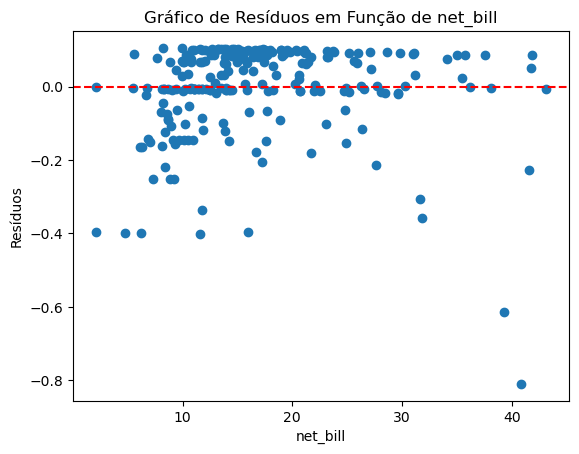

In [15]:
#3.
residuals = model.resid

# Plotar o gráfico de resíduos em função de net_bill
plt.scatter(X['net_bill'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('net_bill')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em Função de net_bill')
plt.show()

In [16]:
#4.
tips['net_bill_log'] = np.log(tips['net_bill'])

# Adicionando net_bill ao quadrado
tips['net_bill_squared'] = tips['net_bill'] ** 2

# Ajustar modelos com as diferentes transformações
model_linear = smf.ols('tip ~ sex + smoker + total_bill + net_bill', data=tips).fit()
model_log = smf.ols('tip ~ sex + smoker + total_bill + net_bill_log', data=tips).fit()
model_poly = smf.ols('tip ~ sex + smoker + total_bill + net_bill_squared', data=tips).fit()

# Comparar os modelos usando métricas como R-quadrado ajustado, AIC e BIC
print("Modelo Linear:")
model_linear.summary()

Modelo Linear:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.814e+28
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:57:42   Log-Likelihood:                 7014.3
No. Observations:                 244   AIC:                        -1.402e+04
Df Residuals:                     239   BIC:                        -1.400e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      4.052e-15   1.62e-14      0.251      0.802   -2.78e-14    3.59e-14
sex[T.Female]  -2.97e-15   1.08e-14     -0.275      0.784   -2.43e-14    1.83e-14
smoker[T.No]  -1.943e-15   1.06e-14     -0.183      0.855   -2.29e-14     1.9e-14
total_bill        1.0000   4.55e-15    2.2e+14      0.000       1.000       1.000
net_bill         -1.0000   5.05e-15  -1.98e+14      0.000      -1.000      -1.000
==============================================================================
Omnibus:                       38.012   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.846
Skew:                           1.033   Prob(JB):                     9.10e-12
Kurtosis:                       3.857   Cond. No.                         98.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
print("\nModelo com Log de net_bill:")
model_log.summary()


Modelo com Log de net_bill:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     66.25
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.21e-37
Time:                        20:57:42   Log-Likelihood:                -333.92
No. Observations:                 244   AIC:                             677.8
Df Residuals:                     239   BIC:                             695.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3799      0.647      6.771      0.000       3.106       5.654
sex[T.Female]    -0.0013      0.130     -0.010      0.992      -0.257       0.255
smoker[T.No]      0.2349      0.128      1.836      0.068      -0.017       0.487
total_bill        0.2121      0.020     10.792      0.000       0.173       0.251
net_bill_log     -2.1108      0.365     -5.784      0.000      -2.830      -1.392
==============================================================================
Omnibus:                        8.299   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               15.205
Skew:                          -0.001   Prob(JB):                     0.000499
Kurtosis:                       4.223   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print("\nModelo com net_bill ao Quadrado:")
model_poly.summary()


Modelo com net_bill ao Quadrado:


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     84.24
Date:                Tue, 12 Mar 2024   Prob (F-statistic):           1.60e-44
Time:                        20:57:42   Log-Likelihood:                -317.64
No. Observations:                 244   AIC:                             645.3
Df Residuals:                     239   BIC:                             662.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.1628      0.290     -4.010      0.000      -1.734      -0.592
sex[T.Female]        0.0575      0.121      0.474      0.636      -0.182       0.297
smoker[T.No]         0.0187      0.120      0.156      0.876      -0.217       0.255
total_bill           0.2959      0.023     12.711      0.000       0.250       0.342
net_bill_squared    -0.0050      0.001     -8.505      0.000      -0.006      -0.004
==============================================================================
Omnibus:                       69.511   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.644
Skew:                           1.112   Prob(JB):                     3.79e-60
Kurtosis:                       7.687   Cond. No.                     2.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
#5.
sse_log = model_log.ssr
sst_log = np.sum((tips['tip'] - tips['tip'].mean()) ** 2)

# Calcular R^2 na escala de tip (sem o log)
r2_original = 1 - (sse_log / sst_log)

print("R^2 na escala de tip para o modelo do item 2:", r2_original)
print("R^2 na escala de tip para o modelo do item 1:", model_linear.rsquared)

R^2 na escala de tip para o modelo do item 2: 0.5258001022467949
R^2 na escala de tip para o modelo do item 1: 1.0


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [20]:
#1.
df = pd.read_csv("previsao_de_renda.csv")
print(df.isnull().sum())
df.head()

Unnamed: 0                  0
data_ref                    0
id_cliente                  0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [21]:
# Retirando a regressão linear simples das variáveis 
reg_renda_simples = smf.ols('renda ~ tempo_emprego', data=df).fit()
df['res_renda_simples'] = reg_renda_simples.resid
reg_renda_simples.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:57:42   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

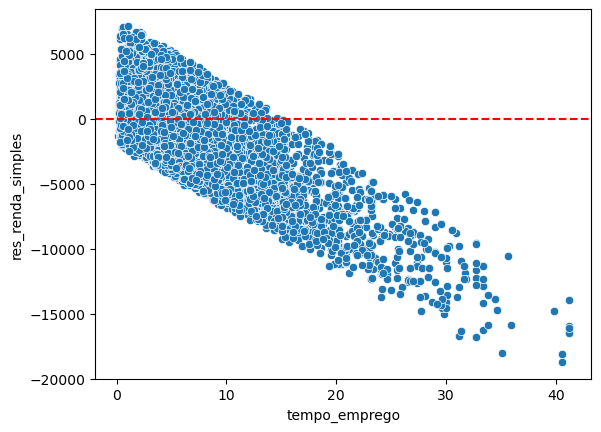

In [22]:
# Tratando outlier 
plt.close('all')
sns.scatterplot(x='tempo_emprego', y='res_renda_simples', data=df[df['renda'] < 10000])
plt.axhline(y=0, color='r', linestyle='--')

In [23]:
# Ajustar um modelo de regressão linear simples com transformação logarítmica na variável resposta
modelo_renda_simples_log = smf.ols('np.log(renda) ~ tempo_emprego', data=df).fit()

# Acessar os resíduos do modelo
residuos = modelo_renda_simples_log.resid

# Visualizar o resumo estatístico do modelo
modelo_renda_simples_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:57:43   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

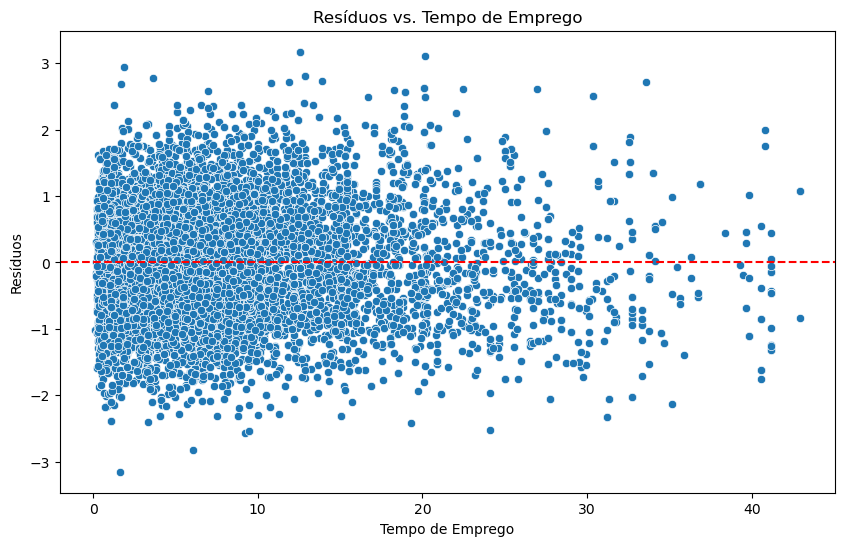

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tempo_emprego'], y=residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Tempo de Emprego')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Tempo de Emprego')
plt.show()

**Gráfico de dispersão Resíduos vs. Tempo de Emprego:** Este gráfico mostra a distribuição dos resíduos em relação à variável explicativa "tempo_emprego". O que observamos é uma dispersão aleatória dos resíduos em torno da linha horizontal zero, o que indica que a premissa de homocedasticidade (variância constante dos resíduos) é razoavelmente atendida.

**Resumo estatístico do modelo de regressão com transformação logarítmica:** O modelo parece ter um ajuste moderado, com um R-quadrado de 0.147. Isso significa que aproximadamente 14.7% da variabilidade na renda é explicada pela variável tempo_emprego. O coeficiente para tempo_emprego é estatisticamente significativo (p-valor < 0.05), sugerindo que há uma relação linear entre tempo_emprego e o logaritmo da renda.